In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('test.csv',index_col='year')
df2 = pd.read_csv('test.csv',index_col='region')

#### Intial Understanding of Dataset

In [4]:
#Information about the dataset
df.info()
#data has null values that need to inspected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 1998 to 2016
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1615 non-null   int64  
 1   region      1615 non-null   object 
 2   wine        1552 non-null   float64
 3   beer        1557 non-null   float64
 4   vodka       1554 non-null   float64
 5   champagne   1552 non-null   float64
 6   brandy      1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 100.9+ KB


In [5]:
# Describtion of the data
df.drop('Unnamed: 0',axis=1,inplace=True)
df.describe()

,wine,beer,vodka,champagne,brandy
count,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,5.628144,51.260148,11.818694,1.313177,0.526998
std,2.813208,25.372821,5.128806,0.797956,0.400201
min,0.100000,0.400000,0.050000,0.100000,0.000000
25%,3.575000,32.400000,8.300000,0.800000,0.200000
50%,5.400000,49.970000,11.500000,1.200000,0.400000
75%,7.377500,67.400000,15.000000,1.665000,0.700000
max,18.100000,207.300000,40.600000,5.560000,2.300000


array([<AxesSubplot:title={'center':'wine'}, xlabel='year'>,
       <AxesSubplot:title={'center':'beer'}, xlabel='year'>,
       <AxesSubplot:title={'center':'vodka'}, xlabel='year'>,
       <AxesSubplot:title={'center':'champagne'}, xlabel='year'>,
       <AxesSubplot:title={'center':'brandy'}, xlabel='year'>],
      dtype=object)

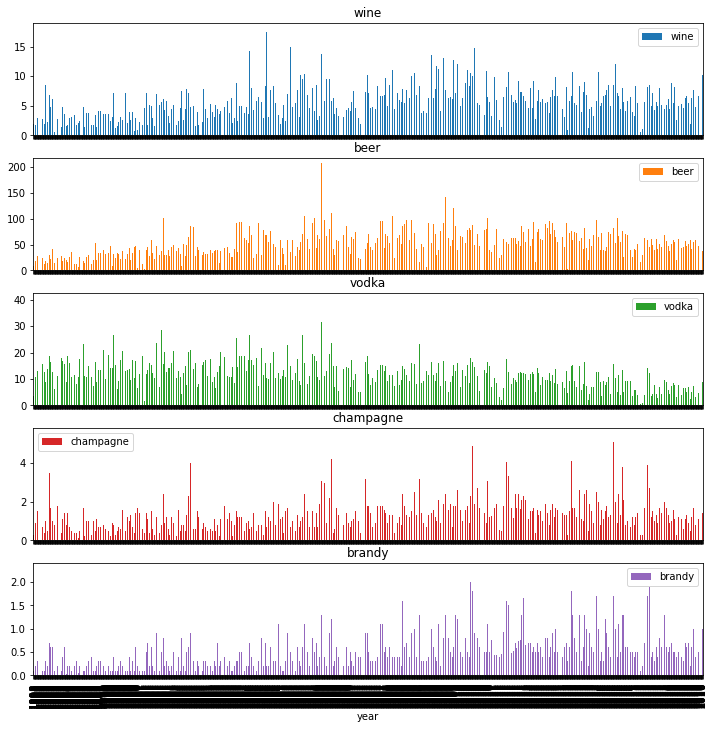

In [6]:
df.plot(subplots=True, figsize=(12,12),kind='bar')

#### Identifying and Removing Null Values from Dataset

In [7]:
segements = ['wine','beer','vodka','champagne','brandy']

In [8]:
segements = ['wine','beer','vodka','champagne','brandy']

nan_count = df[df[segements].isnull().any(axis=1)]

In [9]:
nan_count['na_count'] = nan_count[segements].isnull().sum(axis=1)

/var/folders/f_/7pry8s655d94d_tkt9tbz15h0000gn/T/ipykernel_8678/1506245371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_count['na_count'] = nan_count[segements].isnull().sum(axis=1)


In [10]:
nan_pivot = nan_count.pivot_table(index='region', columns='year', values='na_count').fillna(0)

In [11]:
nan_pivot.index.to_list()

['Chechen Republic',
 'Republic of Crimea',
 'Republic of Ingushetia',
 'Sevastopol']

In [12]:
nan_pivot

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
region,,,,,,,,,,,,,,,,,,,
Chechen Republic,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0
Republic of Crimea,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0
Republic of Ingushetia,5.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0
Sevastopol,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0


In [20]:
df = df[~df.region.isin(nan_pivot.index.to_list())]

In [21]:
df.head()

,region,wine,beer,vodka,champagne,brandy
year,,,,,,
1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


# Exploratory Data Analysis

In [13]:
# Add Total Alchol Consumption

df['total_alc_cons'] = df[segements].sum(axis=1)

In [15]:
def test(df):
    df[

SyntaxError: invalid syntax (3169396714.py, line 1)

In [14]:
print('Total Number of Regions:',df.region.nunique())
print('Total Number of Years:', df.index.nunique())

Total Number of Regions: 85
Total Number of Years: 19


year
1998    AxesSubplot(0.125,0.125;0.775x0.755)
1999    AxesSubplot(0.125,0.125;0.775x0.755)
2000    AxesSubplot(0.125,0.125;0.775x0.755)
2001    AxesSubplot(0.125,0.125;0.775x0.755)
2002    AxesSubplot(0.125,0.125;0.775x0.755)
2003    AxesSubplot(0.125,0.125;0.775x0.755)
2004    AxesSubplot(0.125,0.125;0.775x0.755)
2005    AxesSubplot(0.125,0.125;0.775x0.755)
2006    AxesSubplot(0.125,0.125;0.775x0.755)
2007    AxesSubplot(0.125,0.125;0.775x0.755)
2008    AxesSubplot(0.125,0.125;0.775x0.755)
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_alc_cons, dtype: object

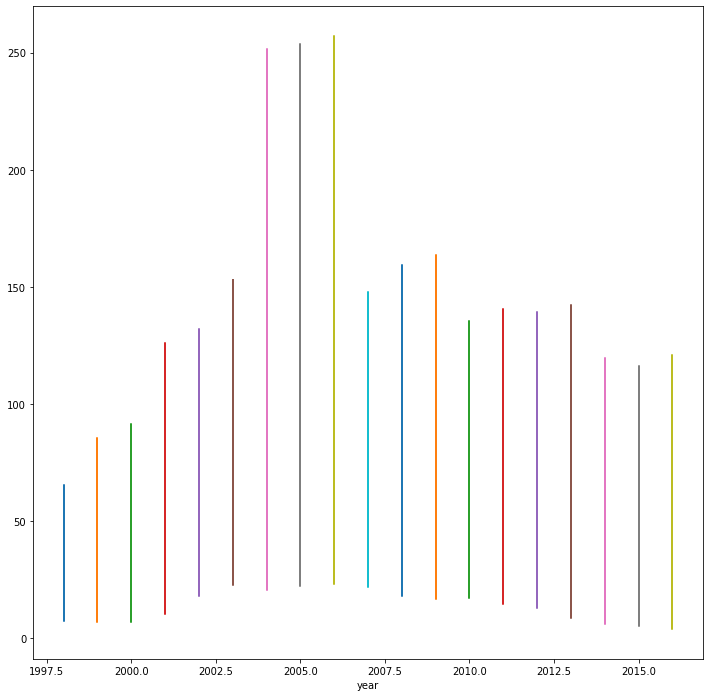

In [46]:
df.groupby('year').total_alc_cons.plot(figsize=(12,12))

In [48]:
for s in segements:
    df[s+'_shr'] = df.apply(lambda x: x[s]/x.total_alc_cons, axis=1) 

In [49]:
df.head()

,region,wine,beer,vodka,champagne,brandy,total_alc_cons,wine_shr,beer_shr,vodka_shr,champagne_shr,brandy_shr
year,,,,,,,,,,,,
1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,14.5,0.131034,0.606897,0.234483,0.020690,0.006897
1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,35.0,0.094286,0.548571,0.322857,0.031429,0.002857
1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,41.7,0.050360,0.508393,0.414868,0.016787,0.009592
1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,27.3,0.157509,0.388278,0.428571,0.014652,0.010989
1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,31.4,0.092357,0.573248,0.302548,0.025478,0.006369


In [50]:
#Subsetting Saint Petersburg
spb_df = df[df.region == 'Saint Petersburg']
spb_df.head(3)

,region,wine,beer,vodka,champagne,brandy,total_alc_cons,wine_shr,beer_shr,vodka_shr,champagne_shr,brandy_shr
year,,,,,,,,,,,,
1998,Saint Petersburg,2.7,27.9,12.3,1.2,0.5,44.6,0.060538,0.625561,0.275785,0.026906,0.011211
1999,Saint Petersburg,2.6,57.4,13.0,1.7,0.6,75.3,0.034529,0.762284,0.172643,0.022576,0.007968
2000,Saint Petersburg,4.4,68.2,14.7,2.0,0.9,90.2,0.048780,0.756098,0.162971,0.022173,0.009978


# Plotting Saint Petersburg Result

In [51]:
sns.set_context('talk') #Context of how the plots should be shown
sns.set_style('dark')

<AxesSubplot:xlabel='year'>

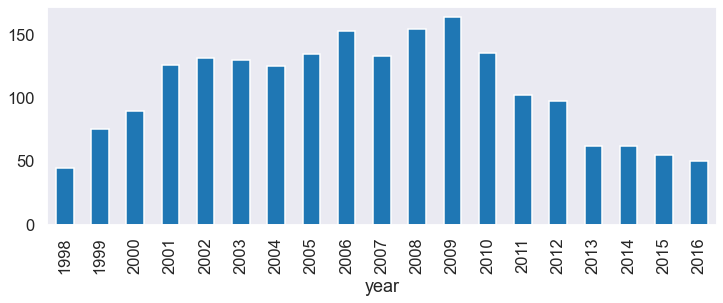

In [47]:
spb_df.total_alc_cons.plot(figsize=(12,4), kind='bar')

<AxesSubplot:xlabel='year'>

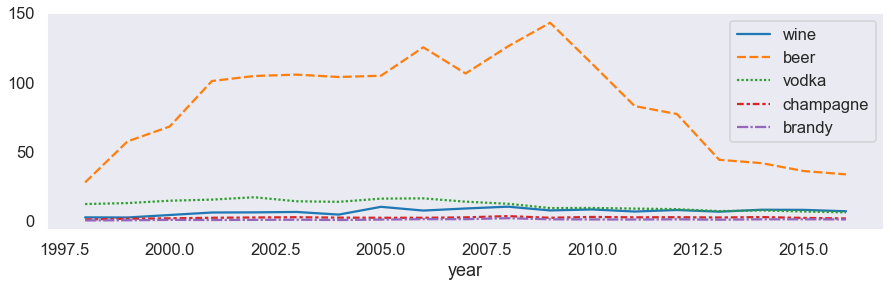

In [82]:
ax, fig = plt.subplots(figsize=(15,4))
sns.lineplot(data=spb_df[segements])

<AxesSubplot:xlabel='year'>

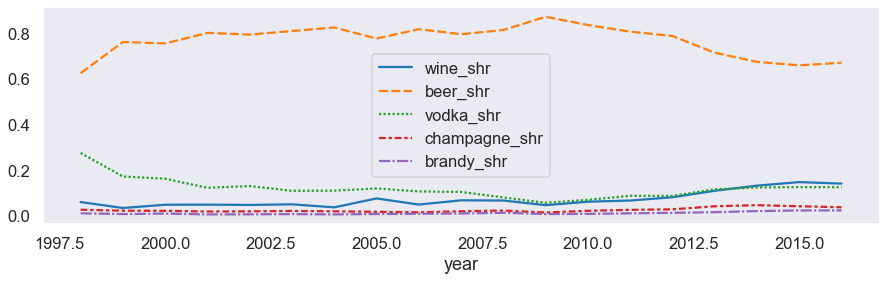

In [92]:
ax, fig = plt.subplots(figsize=(15,4))
sns.lineplot(data=spb_df[segments_shr])

### Removing beer from above plot to see other trends clearly

In [106]:
segments_wob = ['wine_shr', 'vodka_shr', 'champagne_shr', 'brandy_shr']

<AxesSubplot:xlabel='year'>

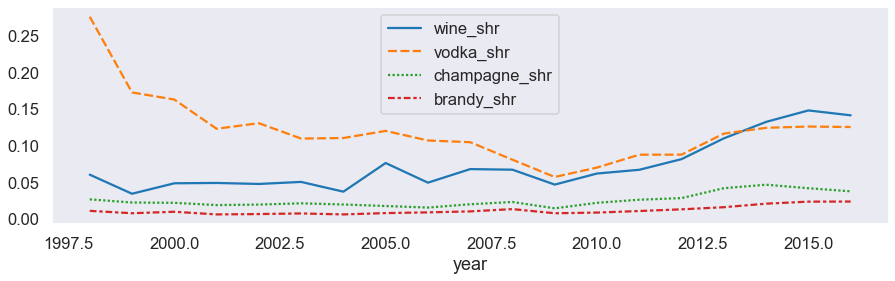

In [108]:
ax, fig = plt.subplots(figsize=(15,4))
sns.lineplot(data=spb_df[segments_wob])

In [89]:
segments_shr

['wine_shr', 'beer_shr', 'vodka_shr', 'champagne_shr', 'brandy_shr']

In [88]:
segments_shr = df.columns[7:].to_list()

<AxesSubplot:xlabel='year', ylabel='total_alc_cons'>

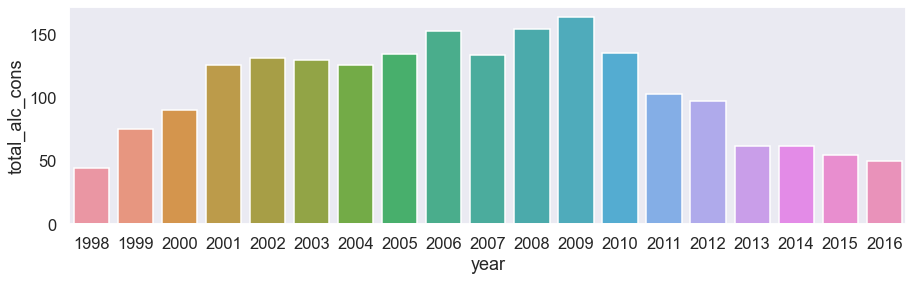

In [79]:
ax, fig = plt.subplots(figsize=(15,4))
sns.barplot(x=spb_df.index,y='total_alc_cons',data=spb_df)

<AxesSubplot:xlabel='year'>

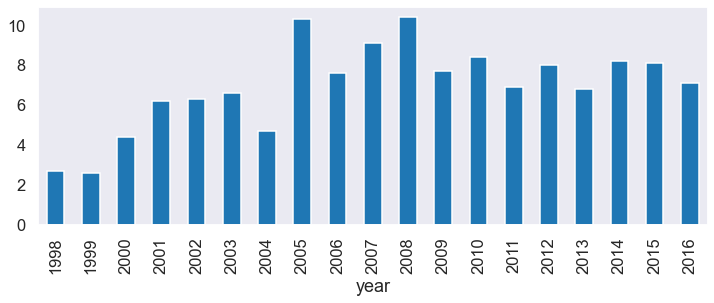

In [174]:
spb_df['wine'].plot(kind='bar',figsize=(12,4))

## Top 40 region with highest alchol consumption

<AxesSubplot:xlabel='region'>

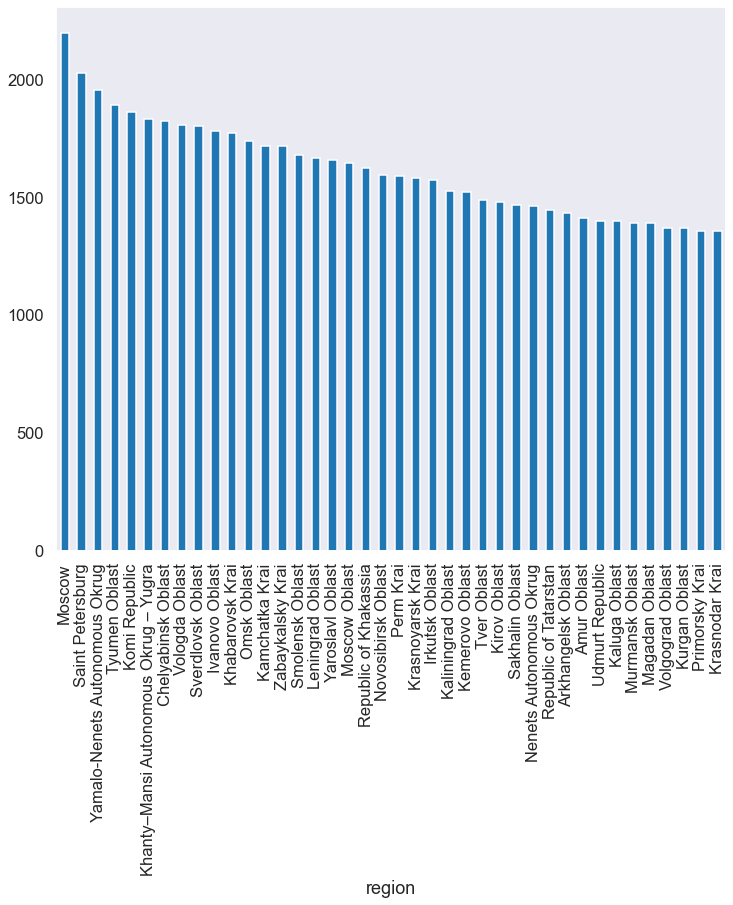

In [168]:
df.groupby('region')['total_alc_cons'].sum().sort_values(ascending=False)[:40].plot(kind='bar',figsize=(12,10))

## Top 10 years with highest alchol consumption

<AxesSubplot:xlabel='year'>

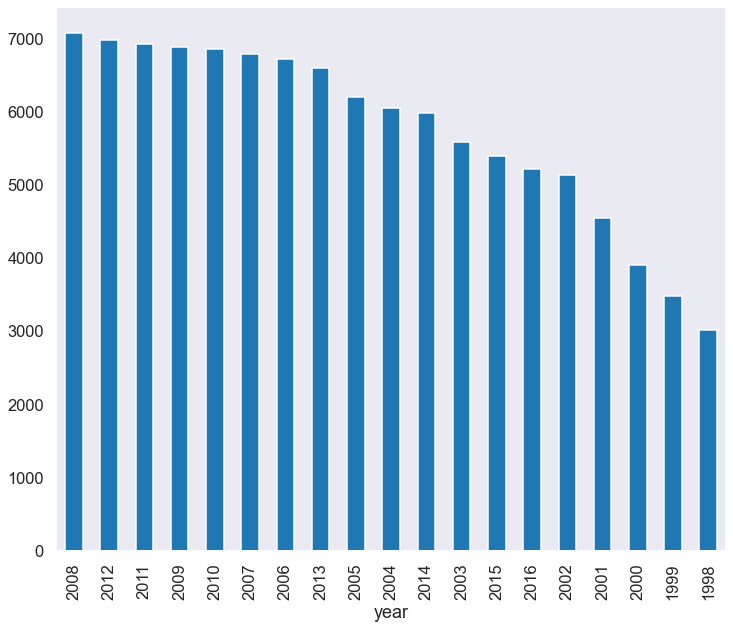

In [169]:
df.groupby('year')['total_alc_cons'].sum().sort_values(ascending=False)[:40].plot(kind='bar',figsize=(12,10))

## Top 20 Regions with Highest Wine Consumption

<AxesSubplot:xlabel='region'>

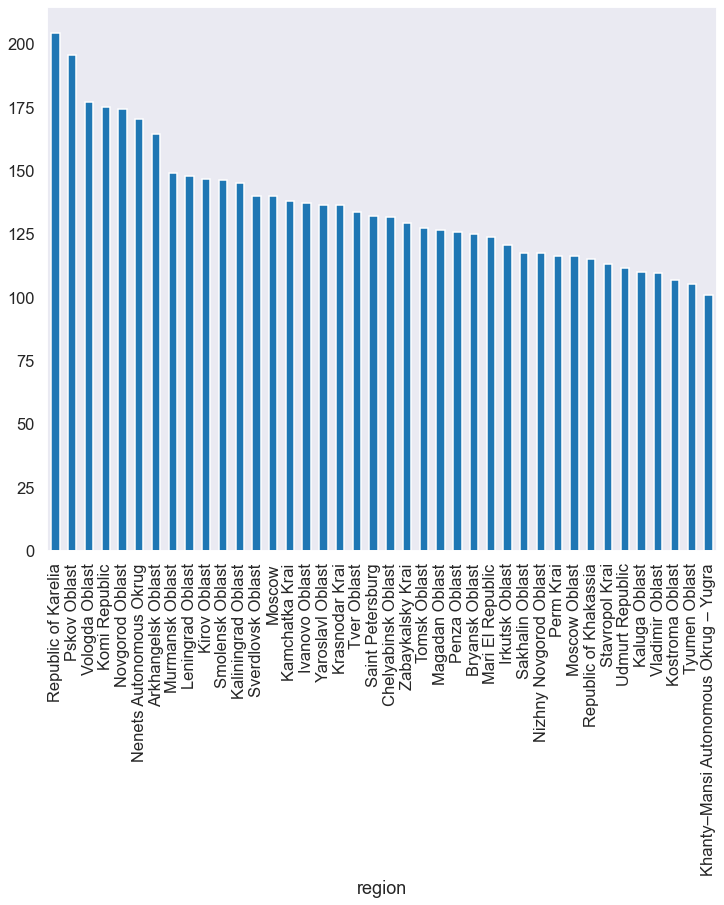

In [170]:
df.groupby('region')['wine'].sum().sort_values(ascending=False)[:40].plot(kind='bar',figsize=(12,10))

## Top 10 years with Highest Wine Consumption

<AxesSubplot:xlabel='year'>

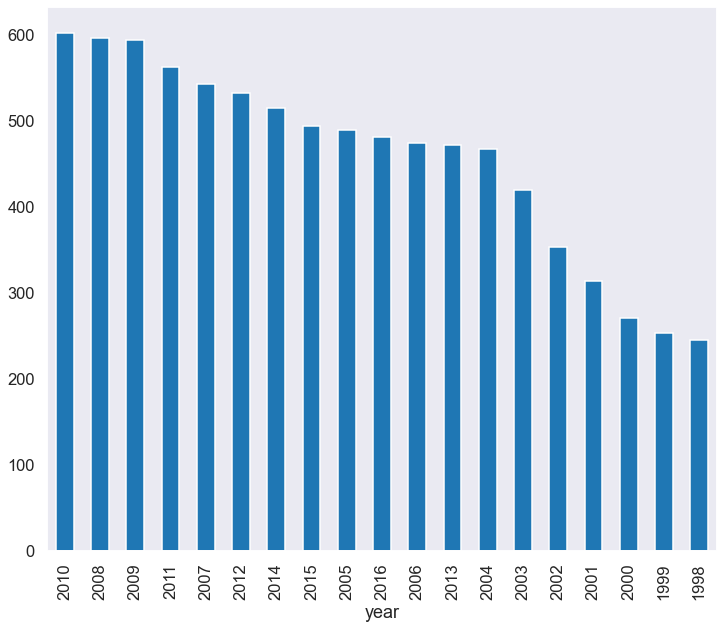

In [171]:
df.groupby('year')['wine'].sum().sort_values(ascending=False)[:40].plot(kind='bar',figsize=(12,10))

In [190]:
nat_df = df[df['region'] != 'Saint Petersburg']

In [196]:
df.shape

(1539, 12)

In [195]:
spb_df.shape

(19, 12)

In [ ]:
df.groupby('year')['wine'].sum().sort_values(ascending=False)[:40].plot(kind='bar',figsize=(12,10))

<AxesSubplot:xlabel='year'>

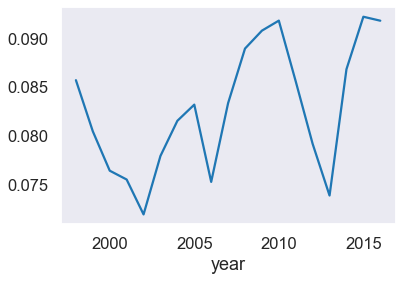

In [206]:
nat_df.groupby('year')['wine_shr'].mean()

In [176]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure(go.Choroplethmapbox(geojson=json_data,
                                    locations=df['region'],
                                    z=map_df['cluster'],
                                    colorscale='Blues',
                                    showscale=False,
                                    customdata=np.stack(map_df['region_name'], axis=-1),
                                    hovertemplate='<b>%{customdata}</b>',
                                    hoverinfo='z'
                                   ))

ModuleNotFoundError: No module named 'plotly'

In [178]:
pip install plotly

     |████████████████████████████████| 15.2 MB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [209]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [269]:
df_2010 = df[df.index>=2009]

In [266]:
df_2010.reset_index()

,year,region,wine,beer,vodka,champagne,brandy,total_alc_cons,wine_shr,beer_shr,vodka_shr,champagne_shr,brandy_shr
0,2009,Republic of Adygea,6.8,31.5,7.4,1.6,1.2,48.5,0.140206,0.649485,0.152577,0.032990,0.024742
1,2009,Altai Krai,3.8,51.6,8.5,1.4,0.3,65.6,0.057927,0.786585,0.129573,0.021341,0.004573
2,2009,Amur Oblast,6.9,75.3,10.5,1.2,0.5,94.4,0.073093,0.797669,0.111229,0.012712,0.005297
3,2009,Arkhangelsk Oblast,11.3,38.7,15.9,2.1,1.1,69.1,0.163531,0.560058,0.230101,0.030391,0.015919
4,2009,Astrakhan Oblast,5.9,74.0,8.7,0.9,0.4,89.9,0.065628,0.823137,0.096774,0.010011,0.004449
...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,56.1,0.089127,0.754011,0.137255,0.012478,0.007130
644,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,52.4,0.074427,0.648855,0.221374,0.034351,0.020992
645,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,70.9,0.060649,0.791255,0.115656,0.025388,0.007052
646,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,91.5,0.049180,0.828415,0.089617,0.018579,0.014208


In [ ]:
        x = df_2010.region

In [274]:
df_2010 = df2[df2.year>=2009]

In [276]:
x=df_2010.index
y=df_2010.iloc[:,1:]

In [277]:
y

,year,wine,beer,vodka,champagne,brandy
region,,,,,,
Republic of Adygea,2009,6.8,31.5,7.4,1.6,1.2
Altai Krai,2009,3.8,51.6,8.5,1.4,0.3
Amur Oblast,2009,6.9,75.3,10.5,1.2,0.5
Arkhangelsk Oblast,2009,11.3,38.7,15.9,2.1,1.1
Astrakhan Oblast,2009,5.9,74.0,8.7,0.9,0.4
...,...,...,...,...,...,...
Chuvash Republic,2016,5.0,42.3,7.7,0.7,0.4
Chukotka Autonomous Okrug,2016,3.9,34.0,11.6,1.8,1.1
Sakha (Yakutia) Republic,2016,4.3,56.1,8.2,1.8,0.5


In [280]:
scaled_features = pd.DataFrame(StandardScaler().fit_transform(df), 
                               index=df.index, columns=df.columns)

# Clustering
Z = linkage(scaled_features, method='complete')

ValueError: could not convert string to float: 'Republic of Adygea'